### Data Preparation

**Import Library**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
tf.random.set_seed(42)
sns.set_theme(style="whitegrid")
import matplotlib.dates as mdates

# !pip install keras-tuner
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
import random

**Read the files**

In [6]:
set1 = pd.read_csv('../Data/SET_main.csv')

# This file is consist of data that have Nan values
set2 = pd.read_csv('../Data/SET_residual.csv')

sp500 = pd.read_csv('../Data/sp500_main.csv')

In [7]:
# make the data  have 5 years
yrs_5 = round(set1.shape[0]/2)
set1 = set1[-yrs_5:]
set1

,Date,ADVANC.BK,AOT.BK,BBL.BK,BDMS.BK,BH.BK,CPALL.BK,CPF.BK,CPN.BK,DELTA.BK,...,INTUCH.BK,IVL.BK,KBANK.BK,KTB.BK,MINT.BK,PTT.BK,PTTEP.BK,SCC.BK,TRUE.BK,TTB.BK
1331,2019-06-18,161.651642,65.409073,164.686691,22.900856,152.155060,78.473831,24.904963,69.404030,6.022193,...,46.055683,40.216579,158.519485,15.603138,37.345432,36.472263,96.724503,386.370758,4.947053,1.423396
1332,2019-06-19,164.900955,70.939987,165.510162,22.680655,151.708847,78.473831,24.904963,70.323288,6.305590,...,46.055683,41.067722,160.605301,15.764828,37.821171,36.856182,97.840561,391.388580,5.180404,1.423396
1333,2019-06-20,165.713272,71.420937,167.156998,22.680655,152.155060,79.172401,24.904963,70.553101,6.400056,...,46.636215,41.280510,161.439606,15.683984,37.583302,37.432056,100.444664,393.061218,5.273745,1.423396
1334,2019-06-21,167.337891,71.661407,164.686691,22.460453,151.708847,79.638130,24.468033,70.093475,6.470905,...,46.442699,40.642147,160.188126,15.683984,37.583302,37.624020,100.444664,394.733765,5.180404,1.430549
1335,2019-06-24,166.525574,72.623306,164.686691,22.460453,152.155060,79.172401,24.249565,69.633835,6.352823,...,47.216755,40.642147,158.936646,15.764828,37.583302,37.624020,101.188698,391.388580,5.180404,1.416243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,2024-12-03,296.000000,61.209999,150.500000,26.000000,212.000000,63.750000,24.200001,60.500000,151.000000,...,102.500000,24.600000,153.500000,20.299999,27.750000,32.250000,128.500000,184.000000,11.900000,1.790000
2658,2024-12-04,289.000000,61.500000,151.500000,25.750000,211.000000,64.000000,24.100000,60.500000,151.000000,...,100.000000,24.500000,155.000000,20.600000,28.000000,32.250000,128.000000,183.000000,12.100000,1.780000
2659,2024-12-06,295.000000,61.000000,152.000000,25.500000,210.000000,63.000000,24.100000,60.250000,150.500000,...,102.500000,25.250000,156.000000,20.700001,27.500000,32.250000,128.000000,183.500000,11.800000,1.830000
2660,2024-12-09,295.000000,60.500000,153.000000,25.250000,202.000000,62.750000,23.900000,59.750000,152.500000,...,101.500000,25.500000,156.500000,21.500000,27.250000,32.000000,126.500000,179.000000,11.800000,1.830000


In [8]:
set1 = set1.set_index('Date')
set1

,ADVANC.BK,AOT.BK,BBL.BK,BDMS.BK,BH.BK,CPALL.BK,CPF.BK,CPN.BK,DELTA.BK,HMPRO.BK,INTUCH.BK,IVL.BK,KBANK.BK,KTB.BK,MINT.BK,PTT.BK,PTTEP.BK,SCC.BK,TRUE.BK,TTB.BK
Date,,,,,,,,,,,,,,,,,,,,
2019-06-18,161.651642,65.409073,164.686691,22.900856,152.155060,78.473831,24.904963,69.404030,6.022193,15.130823,46.055683,40.216579,158.519485,15.603138,37.345432,36.472263,96.724503,386.370758,4.947053,1.423396
2019-06-19,164.900955,70.939987,165.510162,22.680655,151.708847,78.473831,24.904963,70.323288,6.305590,15.303748,46.055683,41.067722,160.605301,15.764828,37.821171,36.856182,97.840561,391.388580,5.180404,1.423396
2019-06-20,165.713272,71.420937,167.156998,22.680655,152.155060,79.172401,24.904963,70.553101,6.400056,15.476671,46.636215,41.280510,161.439606,15.683984,37.583302,37.432056,100.444664,393.061218,5.273745,1.423396
2019-06-21,167.337891,71.661407,164.686691,22.460453,151.708847,79.638130,24.468033,70.093475,6.470905,15.563133,46.442699,40.642147,160.188126,15.683984,37.583302,37.624020,100.444664,394.733765,5.180404,1.430549
2019-06-24,166.525574,72.623306,164.686691,22.460453,152.155060,79.172401,24.249565,69.633835,6.352823,15.130823,47.216755,40.642147,158.936646,15.764828,37.583302,37.624020,101.188698,391.388580,5.180404,1.416243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-03,296.000000,61.209999,150.500000,26.000000,212.000000,63.750000,24.200001,60.500000,151.000000,9.900000,102.500000,24.600000,153.500000,20.299999,27.750000,32.250000,128.500000,184.000000,11.900000,1.790000
2024-12-04,289.000000,61.500000,151.500000,25.750000,211.000000,64.000000,24.100000,60.500000,151.000000,9.700000,100.000000,24.500000,155.000000,20.600000,28.000000,32.250000,128.000000,183.000000,12.100000,1.780000
2024-12-06,295.000000,61.000000,152.000000,25.500000,210.000000,63.000000,24.100000,60.250000,150.500000,9.700000,102.500000,25.250000,156.000000,20.700001,27.500000,32.250000,128.000000,183.500000,11.800000,1.830000


In [9]:
set1.shape

(1331, 20)

### Modeling 

**Data Preparation**

*Creating the function*

In [13]:
# Creating a function for data preparation 
def data_prep(df, stock_columns, test_size, window_size):
    results = {}
    
    for stock in stock_columns:
        print(f"Stock: {stock}")

        df.index = pd.to_datetime(df.index)
        
        # Plot training and test sets
        plt.figure(figsize=(12, 3))
        plt.plot(df.index[:-test_size], df[stock][:-test_size], color='black', label="Training set")
        plt.plot(df.index[-test_size:], df[stock][-test_size:], color='blue', label="Test set")
        plt.title(f"{stock} Training and Test Sets", fontsize=15)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel("Price", fontsize=12)
        
        # show only year
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())   
        plt.xlim(df.index.min(), df.index.max())
        plt.grid(color="lightgray")  
        plt.gca().set_facecolor("white") 
        plt.legend(loc="upper left")
        plt.tight_layout() 
        plt.show()

        # Scale the data 
        scaler = MinMaxScaler()
        
        # Window size (e.g., 30 days)
        window_size = window_size

        # Training set
        train_data = df[stock][:-test_size].values
        train_data = scaler.fit_transform(train_data.reshape(-1, 1))
        
        X_train, y_train = [], []
        for i in range(window_size, len(train_data)):
            X_train.append(train_data[i-window_size:i, 0])
            y_train.append(train_data[i, 0])
        
        # Testing set
        test_data = df[stock][-test_size-window_size:].values
        test_data = scaler.transform(test_data.reshape(-1, 1))
        
        X_test, y_test = [], []
        for i in range(window_size, len(test_data)):
            X_test.append(test_data[i-window_size:i, 0])
            y_test.append(test_data[i, 0])
        
        # Convert to numpy arrays to make it acceptable for the model
        X_train = np.array(X_train).reshape(-1, window_size, 1)
        X_test = np.array(X_test).reshape(-1, window_size, 1)
        y_train = np.array(y_train).reshape(-1, 1)
        y_test = np.array(y_test).reshape(-1, 1)

        print(f'{stock} - X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}')
        print(f'{stock} - X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}')
        
        # Store results
        results[stock] = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test}
    
    return results


*Applying the function for SET1 (Stock exchange of Thailand)*

In [15]:
stock_columns = list(set1.columns)
test_size = 360 
window_size = 60

Stock: ADVANC.BK


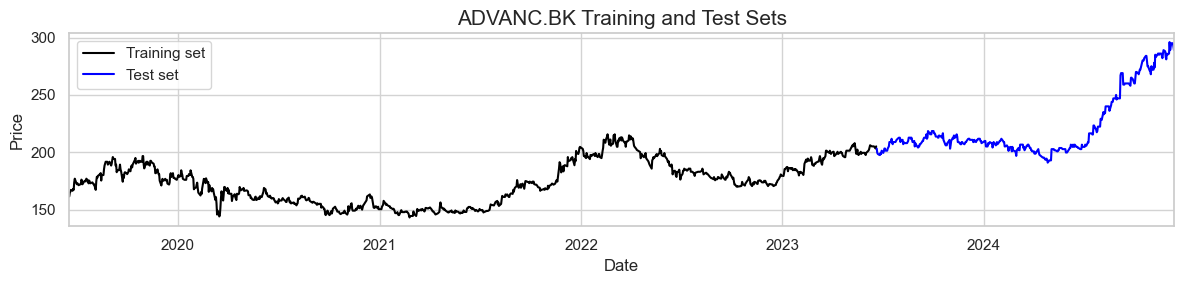

ADVANC.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
ADVANC.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: AOT.BK


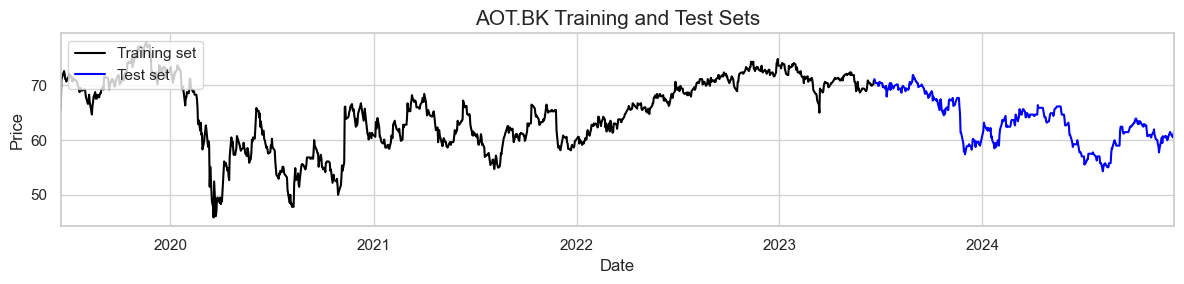

AOT.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
AOT.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: BBL.BK


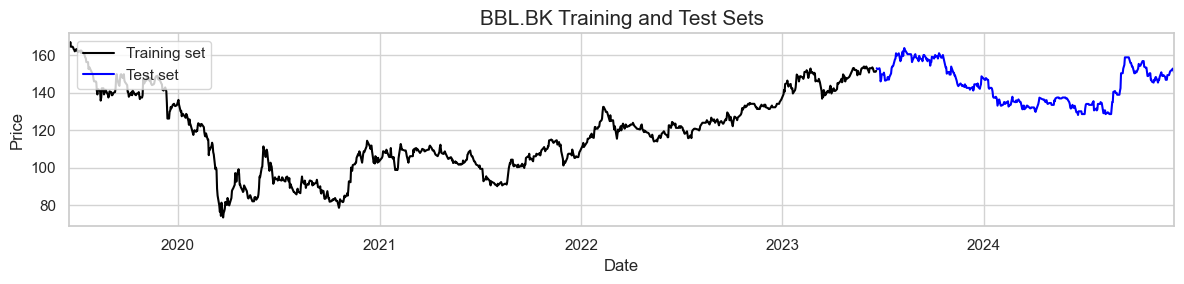

BBL.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
BBL.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: BDMS.BK


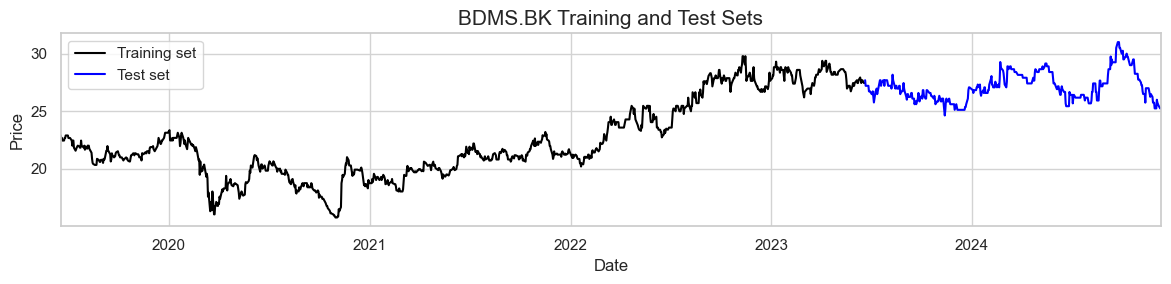

BDMS.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
BDMS.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: BH.BK


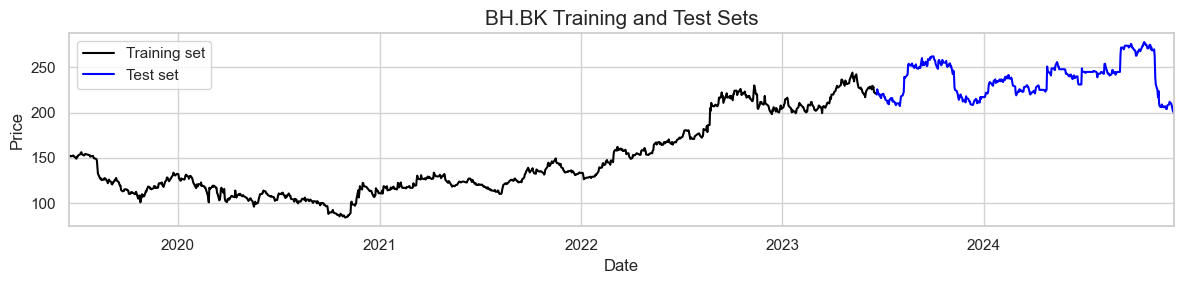

BH.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
BH.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: CPALL.BK


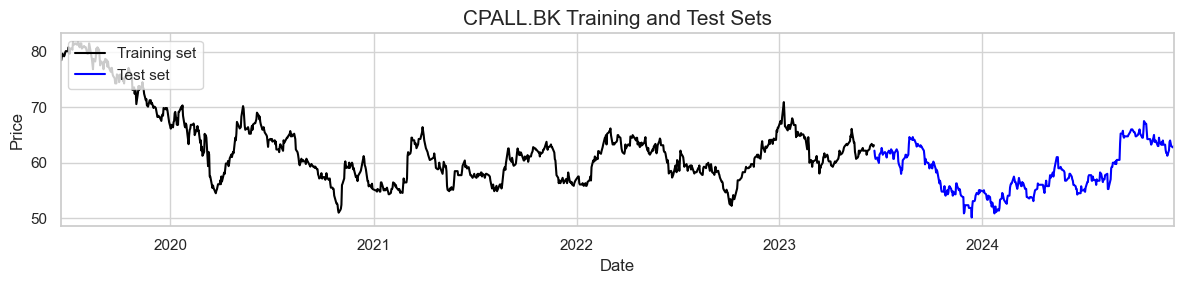

CPALL.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
CPALL.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: CPF.BK


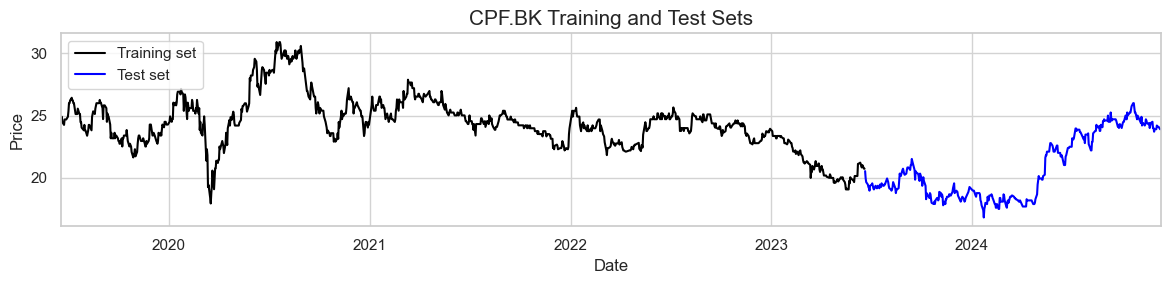

CPF.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
CPF.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: CPN.BK


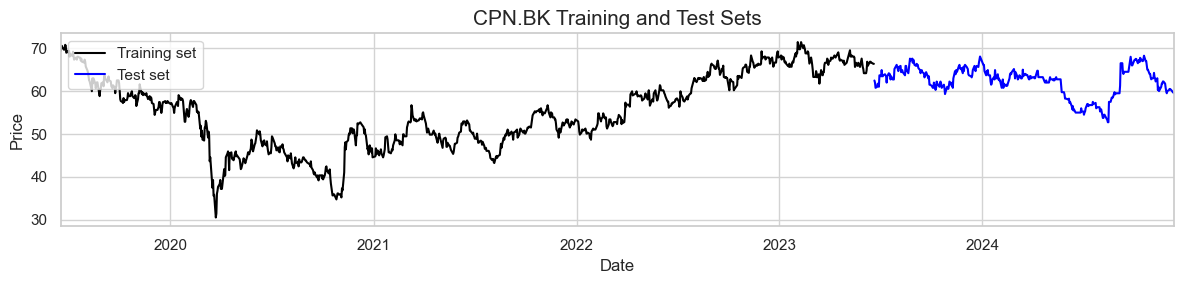

CPN.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
CPN.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: DELTA.BK


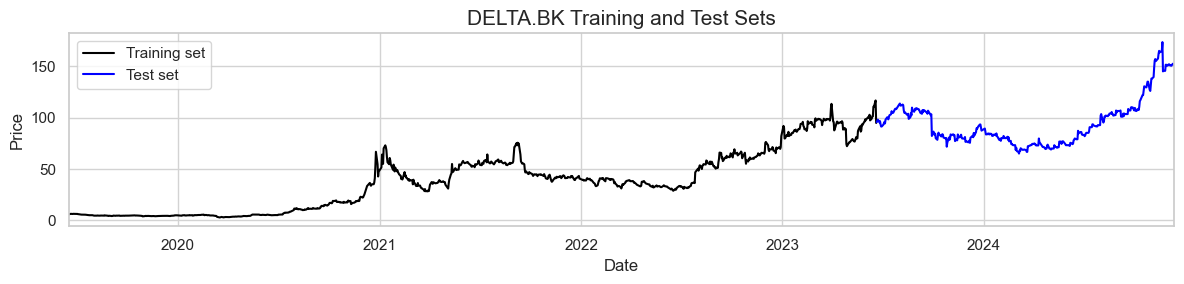

DELTA.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
DELTA.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: HMPRO.BK


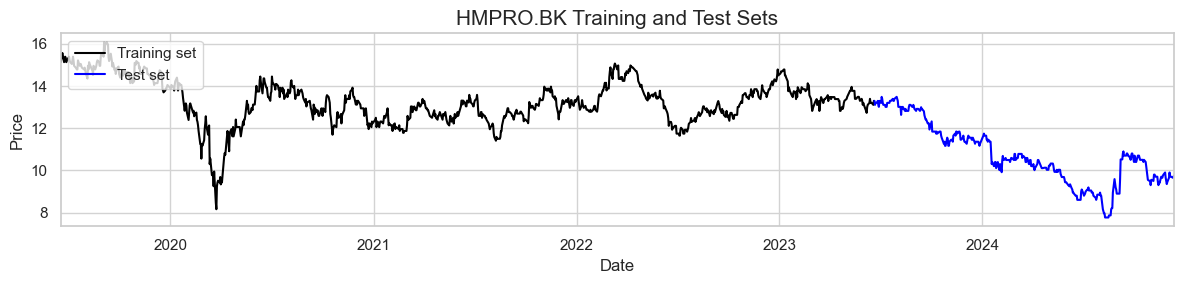

HMPRO.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
HMPRO.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: INTUCH.BK


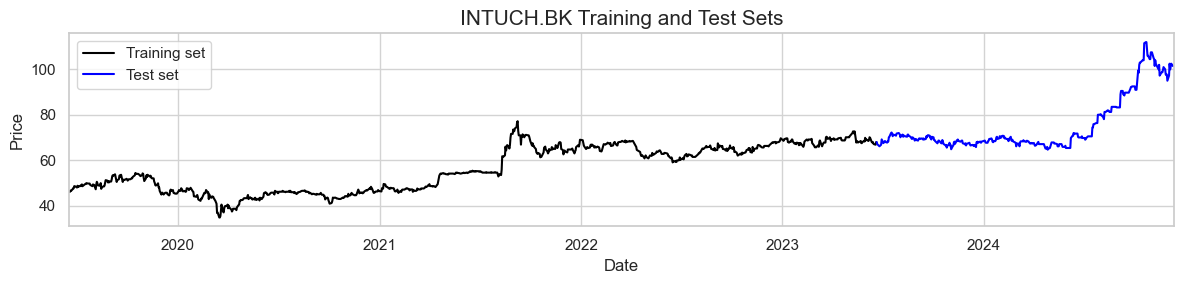

INTUCH.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
INTUCH.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: IVL.BK


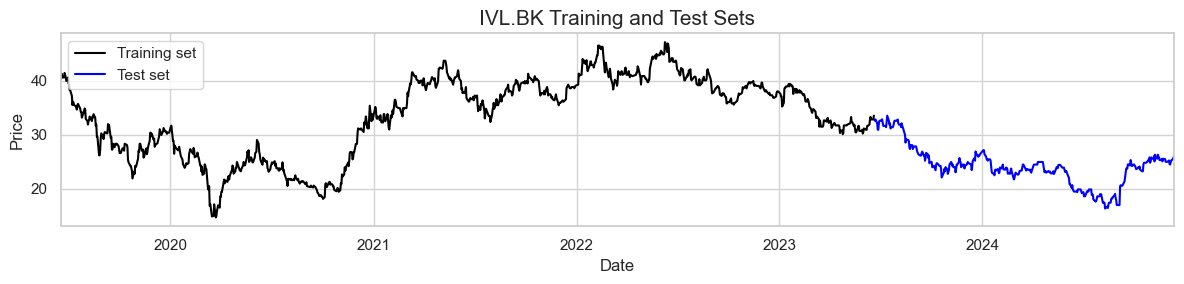

IVL.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
IVL.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: KBANK.BK


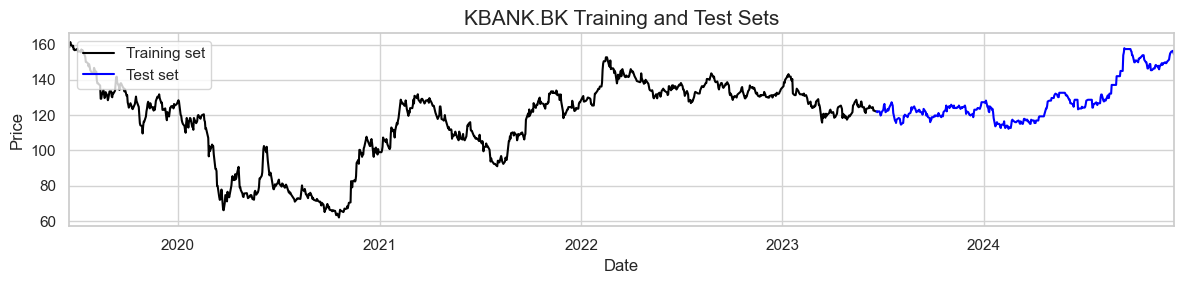

KBANK.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
KBANK.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: KTB.BK


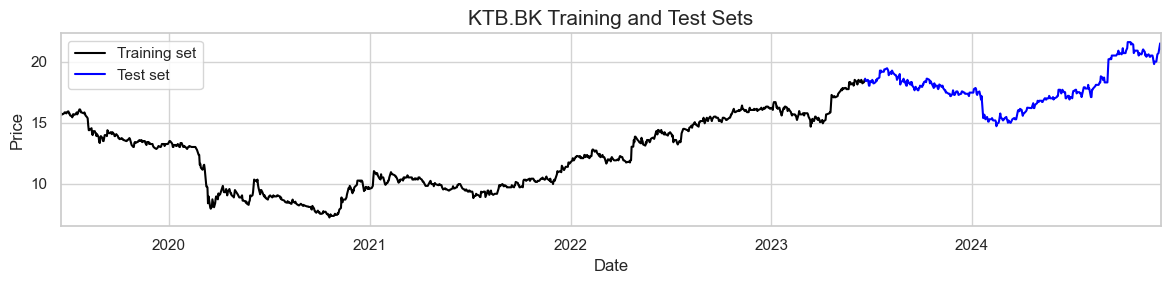

KTB.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
KTB.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: MINT.BK


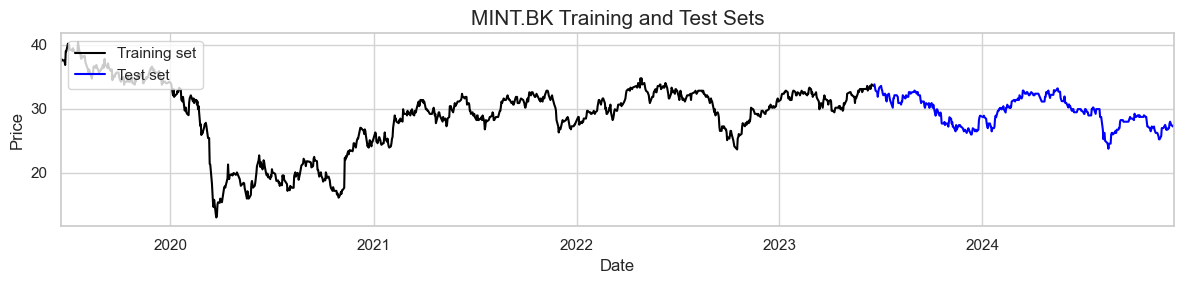

MINT.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
MINT.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: PTT.BK


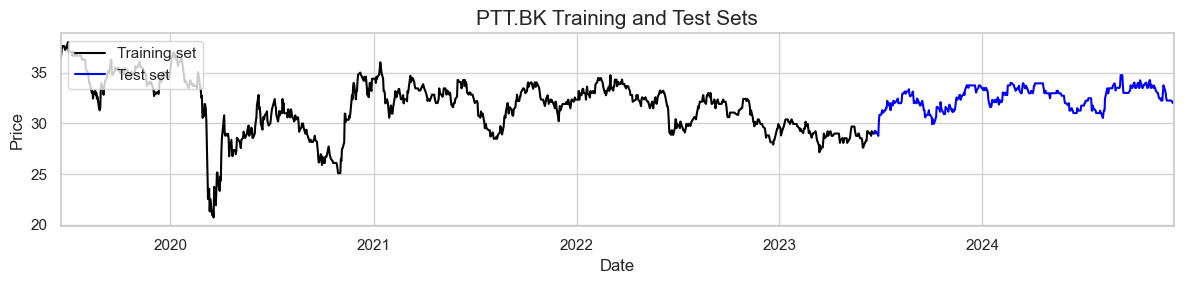

PTT.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
PTT.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: PTTEP.BK


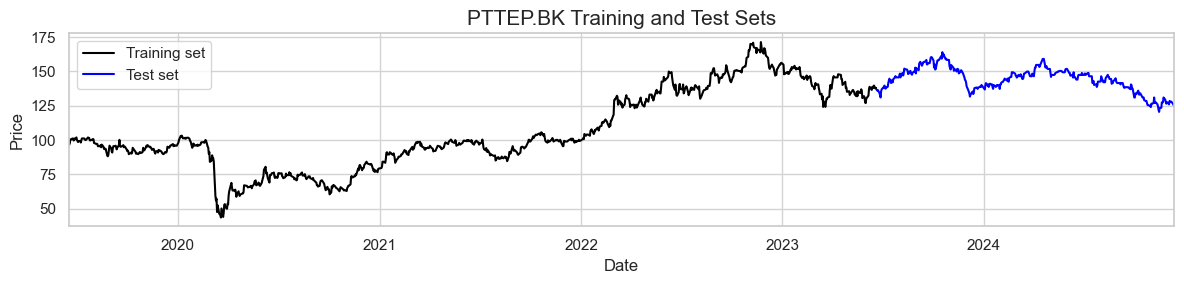

PTTEP.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
PTTEP.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: SCC.BK


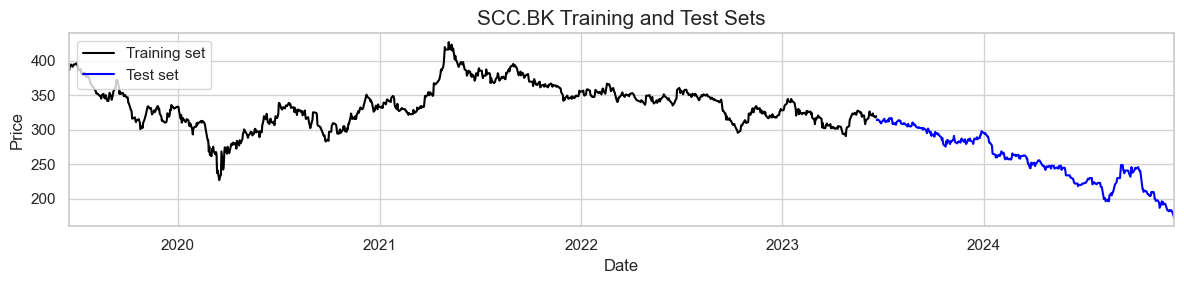

SCC.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
SCC.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: TRUE.BK


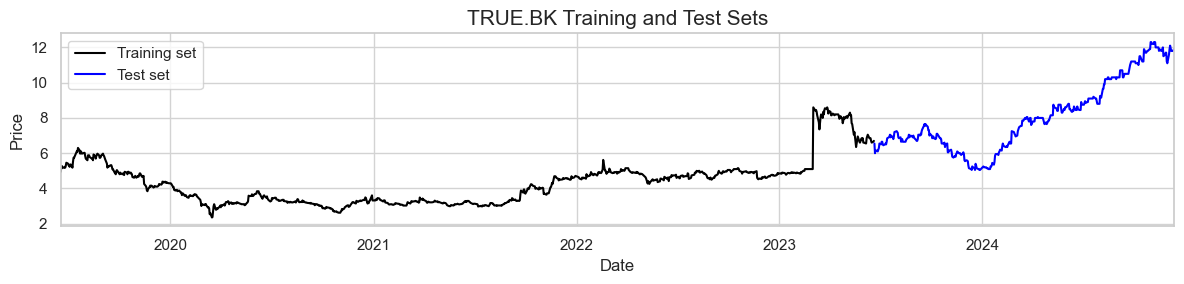

TRUE.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
TRUE.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: TTB.BK


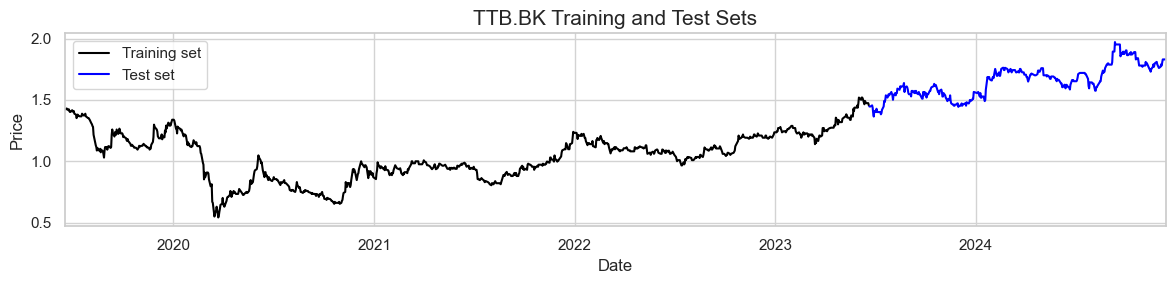

TTB.BK - X_train Shape: (911, 60, 1), y_train Shape: (911, 1)
TTB.BK - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)


In [16]:
# data preparation for dataframe set1
# Adjusting the portfolio for 1 year time frame 
results = data_prep(df=set1, stock_columns=stock_columns, test_size=test_size, window_size=window_size)

**Create function for LSTM model and Training**

*Create the model*

In [19]:
# Set random seeds
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

def define_model(units_lstm_1, units_lstm_2, units_lstm_3, dropout_1, dropout_2, dropout_3, dense_units, optimizer_name):
    input1 = Input(shape=(window_size, 1))
    
    # First LSTM layer 
    x = LSTM(units=units_lstm_1, return_sequences=True)(input1)  
    x = Dropout(dropout_1)(x)
    
    # Second LSTM layer
    x = LSTM(units=units_lstm_2, return_sequences=True)(x)
    x = Dropout(dropout_2)(x)
    
    # Third LSTM layer
    x = LSTM(units=units_lstm_3)(x)
    x = Dropout(dropout_3)(x)
    
    # Dense layer with dynamic units
    x = Dense(dense_units, activation='relu')(x)
    
    # Output layer
    dnn_output = Dense(1)(x)

    # Map optimizer name to optimizer object
    optimizer_mapping = {
        'adam': Adam(),
        'nadam': Nadam(),
        'rmsprop': RMSprop()
    }
    optimizer = optimizer_mapping.get(optimizer_name, Adam())
    
    # Compile the model
    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.summary()
    
    return model

**Find the best hyperparameters**

In [21]:
# Function to Find the best hyperparameters
input1 = Input(shape=(window_size , 1))
def build_model(hp):
    # Tune the number of units in LSTM layers
    x = LSTM(units=hp.Int('units_layer_1', min_value=32, max_value=128, step=32), return_sequences=True)(input1)
    x = Dropout(hp.Float('dropout_layer_1', min_value=0.1, max_value=0.5, step=0.1))(x)

    x = LSTM(units=hp.Int('units_layer_2', min_value=32, max_value=128, step=32), return_sequences=True)(x)
    x = Dropout(hp.Float('dropout_layer_2', min_value=0.1, max_value=0.5, step=0.1))(x)

    x = LSTM(units=hp.Int('units_layer_3', min_value=32, max_value=128, step=32))(x)
    x = Dropout(hp.Float('dropout_layer_3', min_value=0.1, max_value=0.5, step=0.1))(x)

    x = Dense(hp.Int('dense_units', min_value=16, max_value=64, step=16), activation='relu')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])

    # Tune the optimizer and learning rate
    optimizer = hp.Choice('optimizer', values=['adam', 'nadam', 'rmsprop'])
    model.compile(loss='mean_squared_error', 
                  optimizer=optimizer, 
                  metrics=['mean_squared_error'])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    return model


In [22]:
# Loop through each column 
for stock in set1.columns:
    # Recall X_train, X_test, y_train, y_test for each stock
    X_train = results[stock]['X_train']
    X_test = results[stock]['X_test']
    y_train = results[stock]['y_train']
    y_test = results[stock]['y_test']
    
    # Now you can use these variables (X_train, X_test, y_train, y_test) for further processing
    print(f"Processed {stock}: X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

Processed ADVANC.BK: X_train shape: (911, 60, 1), X_test shape: (360, 60, 1)
Processed AOT.BK: X_train shape: (911, 60, 1), X_test shape: (360, 60, 1)
Processed BBL.BK: X_train shape: (911, 60, 1), X_test shape: (360, 60, 1)
Processed BDMS.BK: X_train shape: (911, 60, 1), X_test shape: (360, 60, 1)
Processed BH.BK: X_train shape: (911, 60, 1), X_test shape: (360, 60, 1)
Processed CPALL.BK: X_train shape: (911, 60, 1), X_test shape: (360, 60, 1)
Processed CPF.BK: X_train shape: (911, 60, 1), X_test shape: (360, 60, 1)
Processed CPN.BK: X_train shape: (911, 60, 1), X_test shape: (360, 60, 1)
Processed DELTA.BK: X_train shape: (911, 60, 1), X_test shape: (360, 60, 1)
Processed HMPRO.BK: X_train shape: (911, 60, 1), X_test shape: (360, 60, 1)
Processed INTUCH.BK: X_train shape: (911, 60, 1), X_test shape: (360, 60, 1)
Processed IVL.BK: X_train shape: (911, 60, 1), X_test shape: (360, 60, 1)
Processed KBANK.BK: X_train shape: (911, 60, 1), X_test shape: (360, 60, 1)
Processed KTB.BK: X_trai

In [23]:
# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error', 
    max_trials=2,  
    executions_per_trial=1,  
    directory='tuner_results',
    project_name='lstm_tuning', 
    overwrite=True)
    

**Loop for all stocks name finding best hyperparameters, fit, and evaluate the model**

In [25]:
import time 
def find_fit_eva(df, test_size, results, tuner, define_model):
    # Start the timer for the entire process
    t0 = time.time()
    
    # Initialize dictionary to store hyperparameters + predictions 
    hyperparameters_ = {}
    predictions_ = {}
    models_ = {}
    
    # Loop through each stock column in the dataframe
    for stock in df.columns:
        # Recall X_train, X_test, y_train, y_test for each stock
        X_train = results[stock]['X_train']
        X_test = results[stock]['X_test']
        y_train = results[stock]['y_train']
        y_test = results[stock]['y_test']
        
        # Hyperparameter tuning search for the current stock
        print(f"Starting tuning for {stock}...")
        tuner.search(X_train, y_train, 
                     epochs=50, 
                     batch_size=32, 
                     validation_split=0.2, 
                     verbose=1)
        
        # Get the best hyperparameters
        best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
        print(f"Best Hyperparameters for {stock}:\n {best_hyperparameters.values}")
    
        # Extract parameters values
        units_lstm_1 = best_hyperparameters['units_layer_1']
        units_lstm_2 = best_hyperparameters['units_layer_2']
        units_lstm_3 = best_hyperparameters['units_layer_3']
        dropout_1 = best_hyperparameters['dropout_layer_1']
        dropout_2 = best_hyperparameters['dropout_layer_2']
        dropout_3 = best_hyperparameters['dropout_layer_3']
        dense_units = best_hyperparameters['dense_units']
        optimizer_name = best_hyperparameters['optimizer']
    
        # Save the hyperparameters in a dictionary of DataFrames
        hyperparameters_dict = best_hyperparameters.values
        hyperparameters_[stock] = pd.DataFrame([hyperparameters_dict])
        print(hyperparameters_[stock].T) 
        
        # Define the model with the best hyperparameters
        model = define_model(units_lstm_1, units_lstm_2, units_lstm_3, dropout_1, dropout_2, dropout_3, dense_units, optimizer_name)
        
        # Train the model
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
        
        # Evaluate the model
        print(f"\nEvaluating best model for {stock}")
        test_loss = model.evaluate(X_test, y_test, verbose=0)
        y_pred = model.predict(X_test) 
        print(f'Test loss for {stock}: {test_loss:.4f}')
    
        # Inverse transform predictions and true values
        scaler = MinMaxScaler()
        train_data = df[stock][:-test_size].values
        scaler.fit(train_data.reshape(-1, 1))  # Fit scaler only on training data
        y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))
        y_test_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
        train_data = scaler.transform(train_data.reshape(-1, 1))

        # Store the predicted values for the stock
        predictions_[stock] = y_test_pred
        
        # Calculate evaluation metrics
        MSE = mean_squared_error(y_test_true, y_test_pred)
        RMSE = np.sqrt(MSE)
        print(f"Test MSE for {stock}: {MSE:.4f}")
        print(f"Test RMSE for {stock}: {RMSE:.4f}")

        df.index = pd.to_datetime(df.index)
        
        # Plot the prices predicted with actual
        plt.figure(figsize=(12, 3))
        plt.plot(df.index[:-test_size], scaler.inverse_transform(train_data), color='black', label='Training Data')
        plt.plot(df.index[-test_size:], y_test_true, color='blue', label='Actual Test Data')
        plt.plot(df.index[-test_size:], y_test_pred, color='red', label='Predicted Test Data')
        plt.title(f'Model Performance on {stock} Prediction', fontsize=15)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.legend(loc='upper left')
        plt.show()

        # Save the images
        plt.savefig(f'../images/{stock}_prediction_chart.png', format='png')

        # Store the model for this stock
        models_[stock] = model
        
    # Time to run in seconds for the entire process
    print(f"Total time taken for the entire process: {time.time() - t0} seconds")
    
    return hyperparameters_ , predictions_ , models_


Trial 2 Complete [00h 08m 04s]
val_mean_squared_error: 0.0009950720705091953

Best val_mean_squared_error So Far: 0.0009950720705091953
Total elapsed time: 00h 12m 54s
Best Hyperparameters for ADVANC.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 545ms/step - loss: 0.0876 - val_loss: 0.0154
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 573ms/step - loss: 0.0142 - val_loss: 0.0040
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 395ms/step - loss: 0.0156 - val_loss: 0.0043
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step - loss: 0.0162 - val_loss: 0.0053
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 409ms/step - loss: 0.0096 - val_loss: 0.0260
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step - loss: 0.0094 - val_loss: 0.0070
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step - loss: 0.0078 - val_loss: 0.0070
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 330ms/step - loss: 0.0081 - val_loss: 0.0044
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 352ms/step - loss: 0.0069 - val_loss: 0.0157
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 339ms/step - loss: 0.0063 - val_loss: 0.0051
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 325ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 347ms/

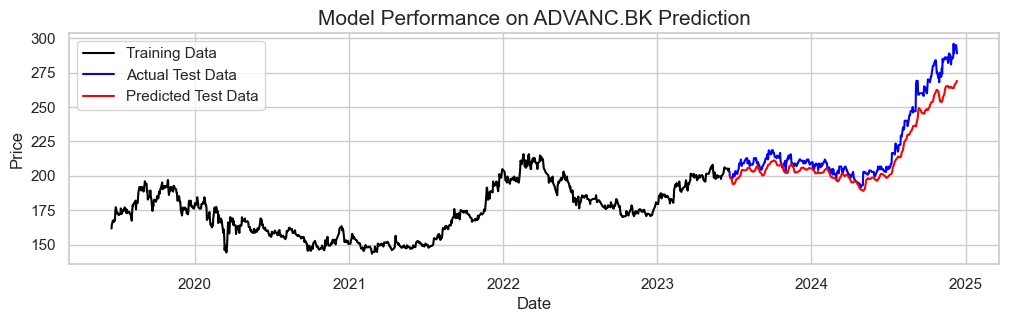

Starting tuning for AOT.BK...
Best Hyperparameters for AOT.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 415ms/step - loss: 0.1671 - val_loss: 0.0333
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step - loss: 0.0173 - val_loss: 0.1112
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 363ms/step - loss: 0.0220 - val_loss: 0.0041
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 442ms/step - loss: 0.0182 - val_loss: 0.0996
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 431ms/step - loss: 0.0165 - val_loss: 0.0031
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 400ms/step - loss: 0.0142 - val_loss: 0.0013
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 507ms/step - loss: 0.0116 - val_loss: 0.0940
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 389ms/step - loss: 0.0127 - val_loss: 0.0049
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 484ms/step - loss: 0.0127 - val_loss: 0.0569
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 403ms/step - loss: 0.0104 - val_loss: 0.0012
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 449ms/step - loss: 0.0109 - val_loss: 0.0250
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 44

<Figure size 640x480 with 0 Axes>

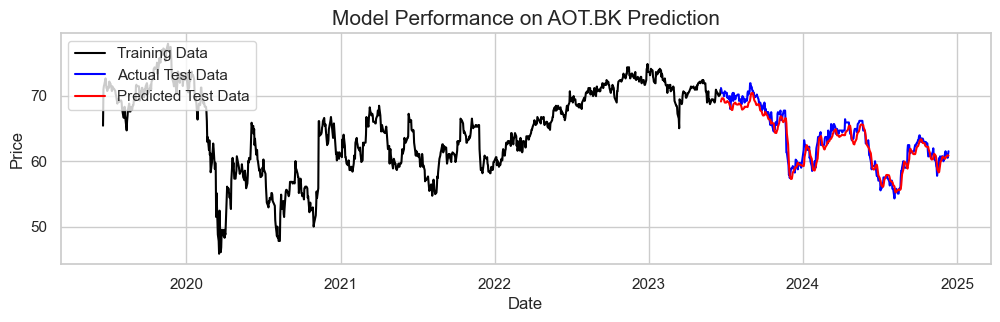

Starting tuning for BBL.BK...
Best Hyperparameters for BBL.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 367ms/step - loss: 0.0483 - val_loss: 0.1658
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 367ms/step - loss: 0.0163 - val_loss: 0.0509
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 347ms/step - loss: 0.0136 - val_loss: 0.0158
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 430ms/step - loss: 0.0070 - val_loss: 0.0490
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 453ms/step - loss: 0.0104 - val_loss: 0.0298
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 533ms/step - loss: 0.0066 - val_loss: 0.0033
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 588ms/step - loss: 0.0045 - val_loss: 0.0322
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 429ms/step - loss: 0.0063 - val_loss: 0.0353
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 362ms/step - loss: 0.0073 - val_loss: 0.0353
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 341ms/step - loss: 0.0056 - val_loss: 0.0111
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 383ms/step - loss: 0.0057 - val_loss: 0.0487
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 332m

<Figure size 640x480 with 0 Axes>

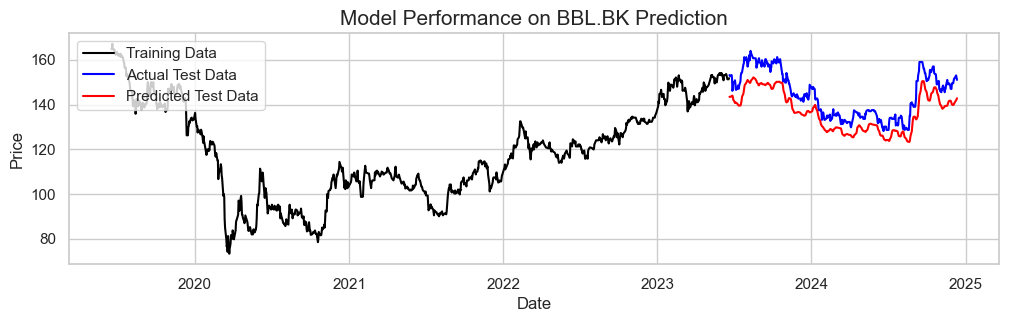

Starting tuning for BDMS.BK...
Best Hyperparameters for BDMS.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 500ms/step - loss: 0.0625 - val_loss: 0.0973
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 429ms/step - loss: 0.0122 - val_loss: 0.0663
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 379ms/step - loss: 0.0108 - val_loss: 0.0214
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 334ms/step - loss: 0.0082 - val_loss: 0.0504
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 316ms/step - loss: 0.0088 - val_loss: 0.0321
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - loss: 0.0070 - val_loss: 0.0375
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 302ms/step - loss: 0.0074 - val_loss: 0.0279
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step - loss: 0.0061 - val_loss: 0.0211
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - loss: 0.0059 - val_loss: 0.0103
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - loss: 0.0053 - val_loss: 0.0033
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - loss: 0.0043 - val_loss: 0.0083
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 292ms/s

<Figure size 640x480 with 0 Axes>

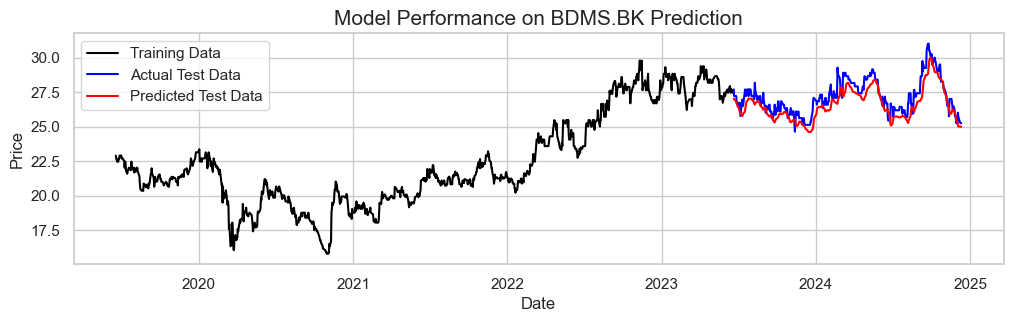

Starting tuning for BH.BK...
Best Hyperparameters for BH.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 359ms/step - loss: 0.0354 - val_loss: 0.0709
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 338ms/step - loss: 0.0063 - val_loss: 0.0873
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 339ms/step - loss: 0.0059 - val_loss: 0.0489
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 323ms/step - loss: 0.0050 - val_loss: 0.0353
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 302ms/step - loss: 0.0045 - val_loss: 0.0179
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 321ms/step - loss: 0.0040 - val_loss: 0.0146
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 333ms/step - loss: 0.0034 - val_loss: 0.0099
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - loss: 0.0023 - val_loss: 0.0049
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 340ms/step - loss: 0.0024 - val_loss: 0.0085
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 340ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 332ms/step - loss: 0.0021 - val_loss: 0.0073
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 321ms/ste

<Figure size 640x480 with 0 Axes>

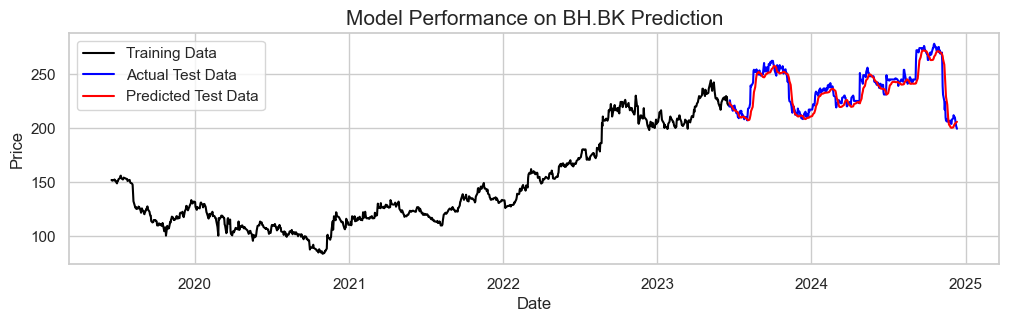

Starting tuning for CPALL.BK...
Best Hyperparameters for CPALL.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 429ms/step - loss: 0.0542 - val_loss: 0.0076
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step - loss: 0.0127 - val_loss: 0.0100
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - loss: 0.0099 - val_loss: 0.0080
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 329ms/step - loss: 0.0104 - val_loss: 0.0075
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - loss: 0.0082 - val_loss: 0.0226
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - loss: 0.0079 - val_loss: 0.0059
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - loss: 0.0082 - val_loss: 0.0040
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step - loss: 0.0067 - val_loss: 0.0034
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 319ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 308ms/step - loss: 0.0062 - val_loss: 0.0044
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 315ms/step - loss: 0.0055 - val_loss: 0.0025
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 341ms/ste

<Figure size 640x480 with 0 Axes>

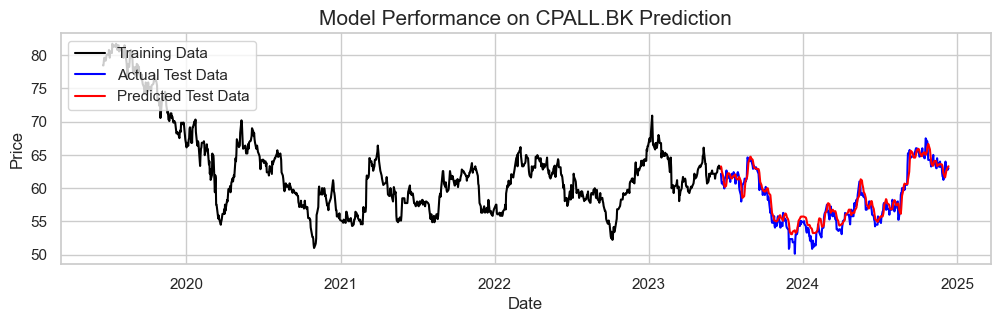

Starting tuning for CPF.BK...
Best Hyperparameters for CPF.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 324ms/step - loss: 0.1140 - val_loss: 0.0248
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - loss: 0.0163 - val_loss: 0.0154
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - loss: 0.0136 - val_loss: 0.0077
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 292ms/step - loss: 0.0137 - val_loss: 0.0062
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - loss: 0.0125 - val_loss: 0.0068
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 327ms/step - loss: 0.0109 - val_loss: 0.0048
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step - loss: 0.0100 - val_loss: 0.0067
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step - loss: 0.0091 - val_loss: 0.0088
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 323ms/step - loss: 0.0089 - val_loss: 0.0040
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 333ms/step - loss: 0.0069 - val_loss: 0.0055
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 333ms/step - loss: 0.0068 - val_loss: 0.0043
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/ste

<Figure size 640x480 with 0 Axes>

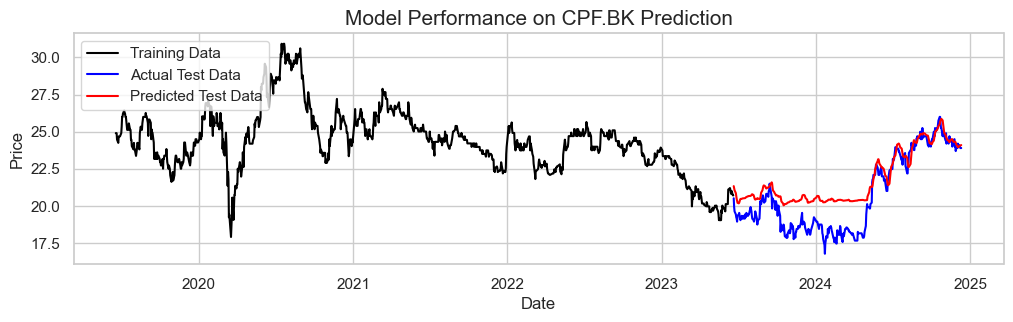

Starting tuning for CPN.BK...
Best Hyperparameters for CPN.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 317ms/step - loss: 0.0772 - val_loss: 0.2065
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - loss: 0.0174 - val_loss: 0.1223
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 286ms/step - loss: 0.0128 - val_loss: 0.1328
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 300ms/step - loss: 0.0122 - val_loss: 0.1097
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 301ms/step - loss: 0.0103 - val_loss: 0.1111
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - loss: 0.0102 - val_loss: 0.0863
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - loss: 0.0096 - val_loss: 0.0650
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - loss: 0.0079 - val_loss: 0.0017
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 284ms/step - loss: 0.0079 - val_loss: 0.0699
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 300ms/step - loss: 0.0090 - val_loss: 0.0117
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - loss: 0.0058 - val_loss: 0.0456
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 317ms/st

<Figure size 640x480 with 0 Axes>

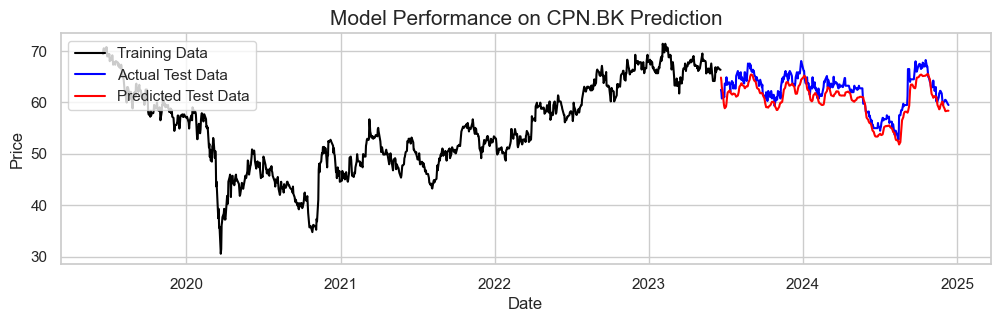

Starting tuning for DELTA.BK...
Best Hyperparameters for DELTA.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 417ms/step - loss: 0.0349 - val_loss: 0.0048
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 494ms/step - loss: 0.0051 - val_loss: 0.0092
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 434ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - loss: 0.0028 - val_loss: 0.0095
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 338ms/step - loss: 0.0030 - val_loss: 0.0098
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 355ms/step - loss: 0.0024 - val_loss: 0.0041
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 327ms/step - loss: 0.0032 - val_loss: 0.0077
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 361ms/step - loss: 0.0019 - val_loss: 0.0088
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 371ms/step - loss: 0.0025 - val_loss: 0.0054
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step - loss: 0.0023 - val_loss: 0.0149
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 354ms/step - loss: 0.0023 - val_loss: 0.0107
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 340ms/s

<Figure size 640x480 with 0 Axes>

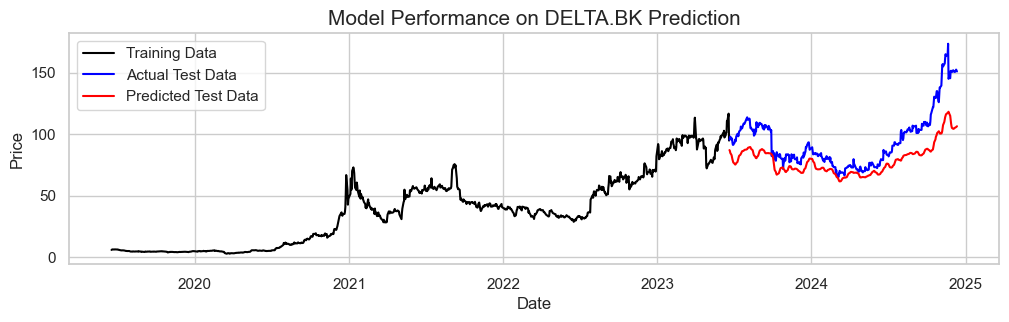

Starting tuning for HMPRO.BK...
Best Hyperparameters for HMPRO.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 445ms/step - loss: 0.2025 - val_loss: 0.0026
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 315ms/step - loss: 0.0147 - val_loss: 0.0096
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 332ms/step - loss: 0.0231 - val_loss: 0.0586
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step - loss: 0.0183 - val_loss: 0.0065
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 279ms/step - loss: 0.0187 - val_loss: 0.0277
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step - loss: 0.0144 - val_loss: 0.0021
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 283ms/step - loss: 0.0132 - val_loss: 0.0310
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 302ms/step - loss: 0.0114 - val_loss: 0.0030
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - loss: 0.0113 - val_loss: 0.0070
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 285ms/step - loss: 0.0101 - val_loss: 0.0313
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 330ms/step - loss: 0.0094 - val_loss: 0.0107
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 291ms/st

<Figure size 640x480 with 0 Axes>

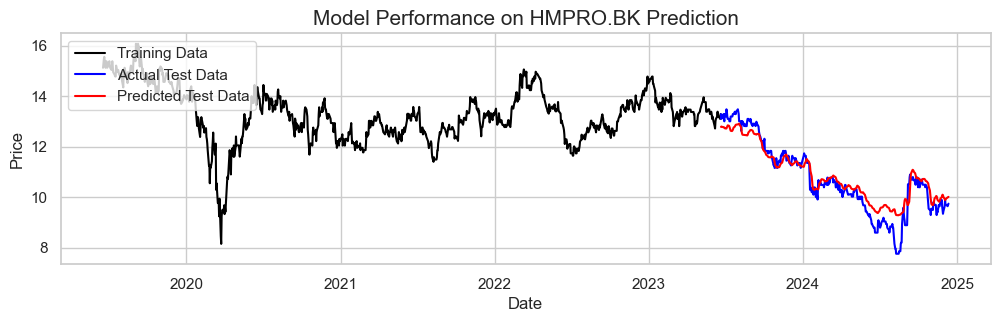

Starting tuning for INTUCH.BK...
Best Hyperparameters for INTUCH.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 463ms/step - loss: 0.0928 - val_loss: 0.0182
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 432ms/step - loss: 0.0220 - val_loss: 0.0689
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 466ms/step - loss: 0.0153 - val_loss: 0.0298
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 450ms/step - loss: 0.0133 - val_loss: 0.0015
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 329ms/step - loss: 0.0083 - val_loss: 0.0038
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 308ms/step - loss: 0.0100 - val_loss: 0.0135
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 322ms/step - loss: 0.0088 - val_loss: 0.0096
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 314ms/step - loss: 0.0074 - val_loss: 0.0114
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 333ms/step - loss: 0.0087 - val_loss: 0.0011
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 328ms/step - loss: 0.0075 - val_loss: 0.0016
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - loss: 0.0069 - val_loss: 0.0011
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/

<Figure size 640x480 with 0 Axes>

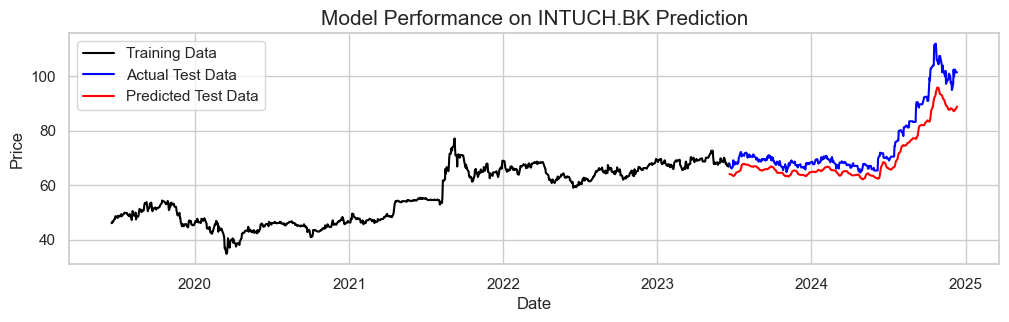

Starting tuning for IVL.BK...
Best Hyperparameters for IVL.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_36 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 359ms/step - loss: 0.1057 - val_loss: 0.0055
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step - loss: 0.0196 - val_loss: 0.0147
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - loss: 0.0182 - val_loss: 0.0035
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step - loss: 0.0153 - val_loss: 0.0018
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - loss: 0.0107 - val_loss: 0.0026
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 352ms/step - loss: 0.0103 - val_loss: 0.0102
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 308ms/step - loss: 0.0091 - val_loss: 0.0031
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - loss: 0.0096 - val_loss: 0.0018
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - loss: 0.0093 - val_loss: 0.0027
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step - loss: 0.0094 - val_loss: 0.0023
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/ste

<Figure size 640x480 with 0 Axes>

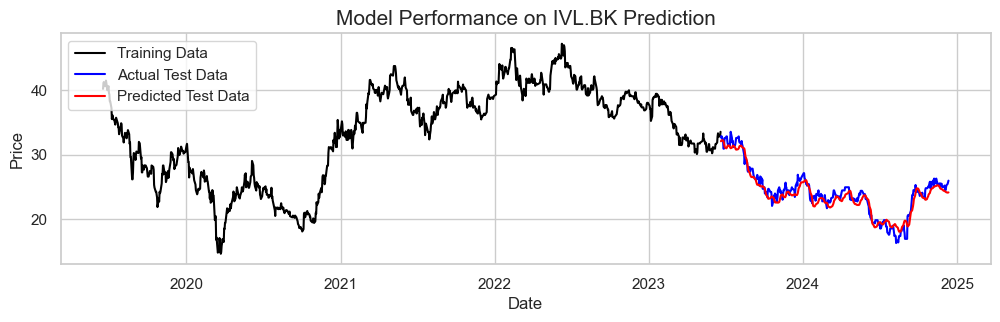

Starting tuning for KBANK.BK...
Best Hyperparameters for KBANK.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_40 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 433ms/step - loss: 0.0967 - val_loss: 0.0197
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 396ms/step - loss: 0.0174 - val_loss: 0.0365
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 386ms/step - loss: 0.0136 - val_loss: 0.0329
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 390ms/step - loss: 0.0140 - val_loss: 0.0146
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - loss: 0.0103 - val_loss: 0.0216
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step - loss: 0.0104 - val_loss: 0.0074
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 415ms/step - loss: 0.0103 - val_loss: 0.0021
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step - loss: 0.0133 - val_loss: 0.0210
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 426ms/step - loss: 0.0082 - val_loss: 0.0135
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 361ms/step - loss: 0.0065 - val_loss: 0.0045
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 445ms/step - loss: 0.0095 - val_loss: 0.0117
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 395ms

<Figure size 640x480 with 0 Axes>

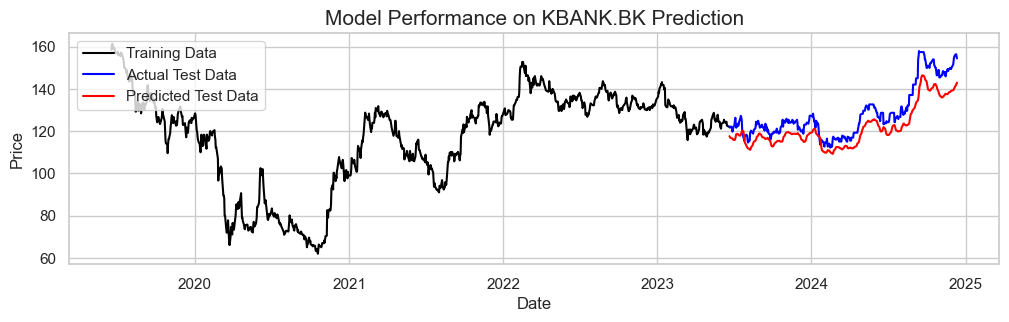

Starting tuning for KTB.BK...
Best Hyperparameters for KTB.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_42 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_44 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 386ms/step - loss: 0.0484 - val_loss: 0.0736
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 354ms/step - loss: 0.0109 - val_loss: 0.1080
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 371ms/step - loss: 0.0075 - val_loss: 0.0954
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 351ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 315ms/step - loss: 0.0074 - val_loss: 0.0361
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - loss: 0.0043 - val_loss: 0.0287
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 364ms/step - loss: 0.0042 - val_loss: 0.0656
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - loss: 0.0042 - val_loss: 0.0413
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 0.0042 - val_loss: 0.0401
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.0045 - val_loss: 0.0030
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0034 - val_loss: 0.0185
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/ste

<Figure size 640x480 with 0 Axes>

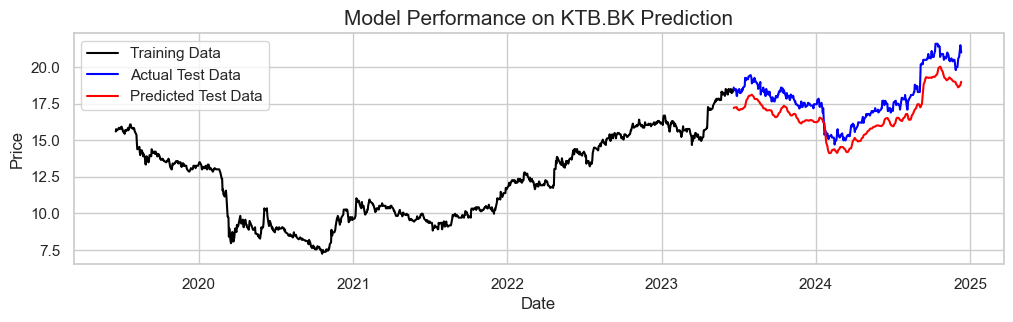

Starting tuning for MINT.BK...
Best Hyperparameters for MINT.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_45 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_46 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - loss: 0.1346 - val_loss: 0.0105
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - loss: 0.0222 - val_loss: 0.0104
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - loss: 0.0182 - val_loss: 0.0214
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - loss: 0.0137 - val_loss: 0.0078
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - loss: 0.0091 - val_loss: 0.0206
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 0.0138 - val_loss: 0.0261
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 0.0090 - val_loss: 0.0116
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0087 - val_loss: 0.0039
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 0.0083 - val_loss: 0.0013
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.0071 - val_loss: 0.0017
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 0.0056 - val_loss: 0.0133
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step

<Figure size 640x480 with 0 Axes>

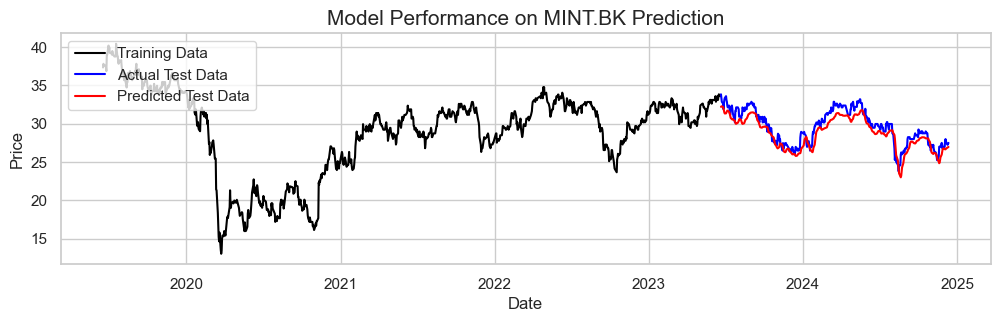

Starting tuning for PTT.BK...
Best Hyperparameters for PTT.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_48 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_49 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_50 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - loss: 0.1498 - val_loss: 0.0102
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 0.0261 - val_loss: 0.0087
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 0.0224 - val_loss: 0.0149
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - loss: 0.0186 - val_loss: 0.0092
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - loss: 0.0170 - val_loss: 0.0021
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - loss: 0.0152 - val_loss: 0.0024
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - loss: 0.0124 - val_loss: 0.0017
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 0.0101 - val_loss: 0.0032
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - loss: 0.0116 - val_loss: 0.0075
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - loss: 0.0119 - val_loss: 0.0016
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step - loss: 0.0097 - val_loss: 0.0049
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step

<Figure size 640x480 with 0 Axes>

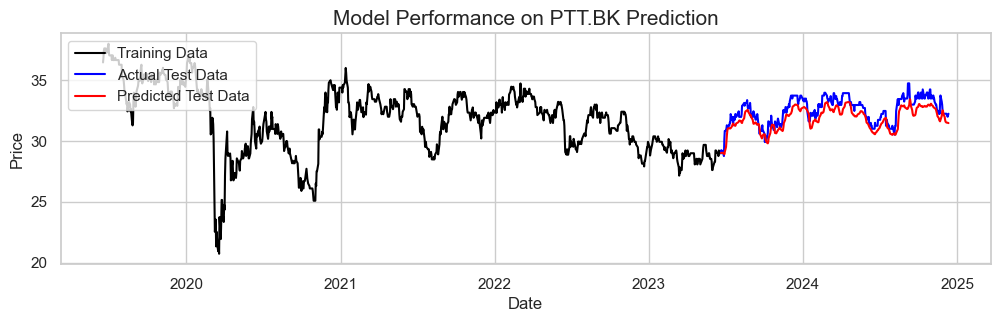

Starting tuning for PTTEP.BK...
Best Hyperparameters for PTTEP.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_51 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_52 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 263ms/step - loss: 0.0816 - val_loss: 0.0836
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step - loss: 0.0107 - val_loss: 0.1067
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 0.0101 - val_loss: 0.0550
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - loss: 0.0084 - val_loss: 0.0556
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - loss: 0.0073 - val_loss: 0.0410
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0083 - val_loss: 0.0038
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 0.0063 - val_loss: 0.0105
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - loss: 0.0066 - val_loss: 0.0745
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 261ms/step - loss: 0.0057 - val_loss: 0.0088
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - loss: 0.0056 - val_loss: 0.0113
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 300ms/step - loss: 0.0053 - val_loss: 0.0097
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/ste

<Figure size 640x480 with 0 Axes>

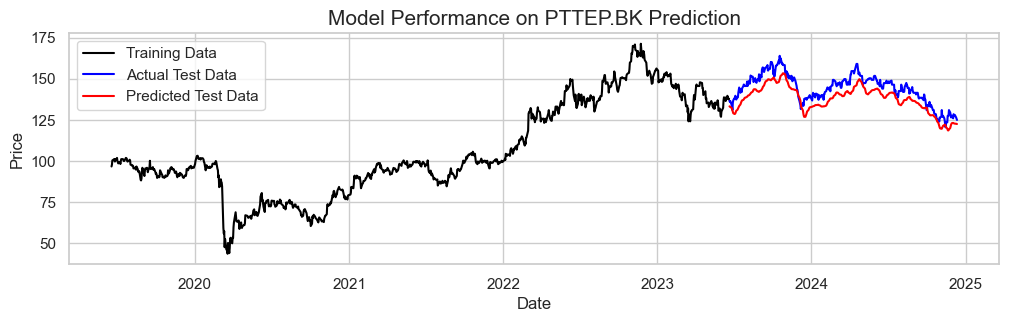

Starting tuning for SCC.BK...
Best Hyperparameters for SCC.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_54 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_55 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_56 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - loss: 0.1385 - val_loss: 0.0126
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 0.0213 - val_loss: 0.0081
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.0174 - val_loss: 0.0034
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - loss: 0.0120 - val_loss: 0.0100
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - loss: 0.0149 - val_loss: 0.0038
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - loss: 0.0084 - val_loss: 0.0025
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - loss: 0.0082 - val_loss: 0.0040
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 0.0087 - val_loss: 0.0037
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0110 - val_loss: 0.0024
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0068 - val_loss: 0.0059
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0090 - val_loss: 0.0034
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step

<Figure size 640x480 with 0 Axes>

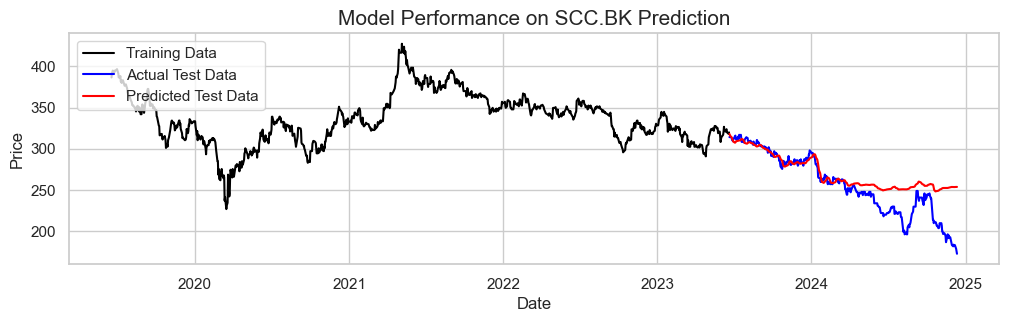

Starting tuning for TRUE.BK...
Best Hyperparameters for TRUE.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_57 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_58 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_59 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - loss: 0.0236 - val_loss: 0.0867
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - loss: 0.0037 - val_loss: 0.0909
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 300ms/step - loss: 0.0042 - val_loss: 0.0721
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - loss: 0.0034 - val_loss: 0.0962
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - loss: 0.0038 - val_loss: 0.0745
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - loss: 0.0031 - val_loss: 0.0612
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - loss: 0.0025 - val_loss: 0.0379
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - loss: 0.0023 - val_loss: 0.0359
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.0025 - val_loss: 0.0288
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - loss: 0.0023 - val_loss: 0.0504
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - loss: 0.0021 - val_loss: 0.0374
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step

<Figure size 640x480 with 0 Axes>

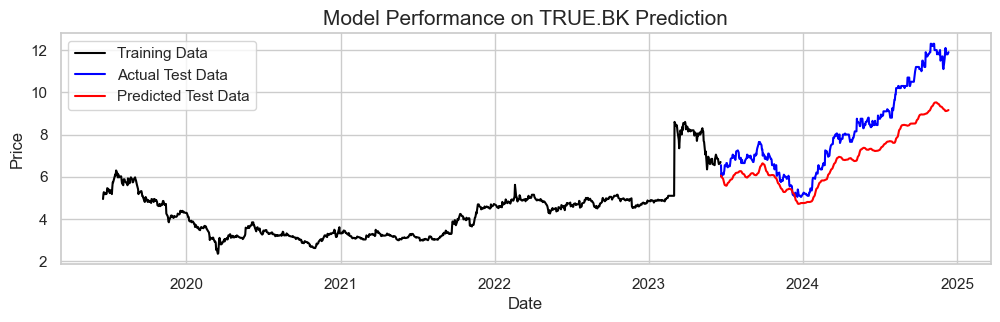

Starting tuning for TTB.BK...
Best Hyperparameters for TTB.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_60 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_61 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_62 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 238ms/step - loss: 0.0679 - val_loss: 0.0063
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - loss: 0.0117 - val_loss: 0.0053
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - loss: 0.0079 - val_loss: 0.0248
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - loss: 0.0110 - val_loss: 0.0039
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - loss: 0.0055 - val_loss: 0.0255
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 0.0083 - val_loss: 0.0262
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 0.0109 - val_loss: 0.0102
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - loss: 0.0056 - val_loss: 0.0058
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 0.0043 - val_loss: 0.0287
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 0.0056 - val_loss: 0.0266
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step

<Figure size 640x480 with 0 Axes>

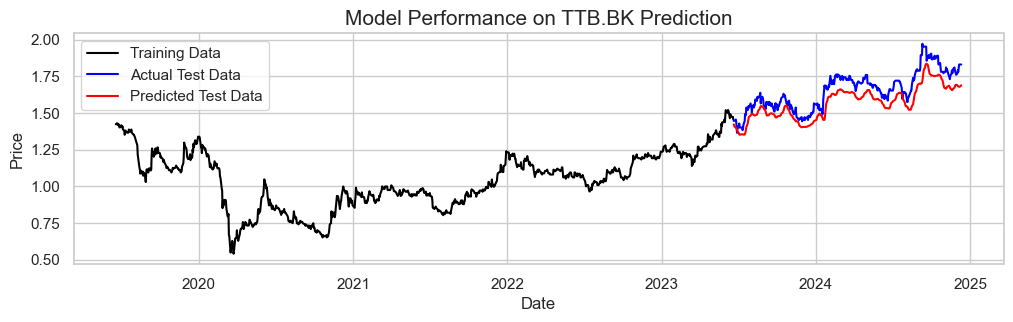

Total time taken for the entire process: 8132.867308855057 seconds


<Figure size 640x480 with 0 Axes>

In [26]:
SET1_results = find_fit_eva(df=set1, test_size=test_size, results=results, tuner=tuner, define_model=define_model)

**Saving Model**

In [51]:
# SET1_results[0] into a single DataFrame
SET1_results_df = pd.concat(
    [df.assign(stock=stock) for stock, df in SET1_results[0].items()],
    ignore_index=True)

# Export
SET1_results_df.to_csv("../Data/SET1_hyper_df_5yrs.csv", index=False)

In [52]:
predictions = SET1_results[1]
predictions_df = pd.DataFrame({stock: pred.ravel() for stock, pred in predictions.items()})

# Export
predictions_df.to_csv("../Data/predictions_set_5yrs.csv", index=False)

In [53]:
import keras
import os
models_ = SET1_results[2]
# Creating a directory to save models
os.makedirs('models', exist_ok=True)

# Loop through each stock model
for stock, model in models_.items():
    model_filename = f'models/{stock}_model_5yrs.keras' 
    model.save(model_filename)
    print(f"Model for {stock} saved to {model_filename}")

Model for ADVANC.BK saved to models/ADVANC.BK_model_5yrs.keras
Model for AOT.BK saved to models/AOT.BK_model_5yrs.keras
Model for BBL.BK saved to models/BBL.BK_model_5yrs.keras
Model for BDMS.BK saved to models/BDMS.BK_model_5yrs.keras
Model for BH.BK saved to models/BH.BK_model_5yrs.keras
Model for CPALL.BK saved to models/CPALL.BK_model_5yrs.keras
Model for CPF.BK saved to models/CPF.BK_model_5yrs.keras
Model for CPN.BK saved to models/CPN.BK_model_5yrs.keras
Model for DELTA.BK saved to models/DELTA.BK_model_5yrs.keras
Model for HMPRO.BK saved to models/HMPRO.BK_model_5yrs.keras
Model for INTUCH.BK saved to models/INTUCH.BK_model_5yrs.keras
Model for IVL.BK saved to models/IVL.BK_model_5yrs.keras
Model for KBANK.BK saved to models/KBANK.BK_model_5yrs.keras
Model for KTB.BK saved to models/KTB.BK_model_5yrs.keras
Model for MINT.BK saved to models/MINT.BK_model_5yrs.keras
Model for PTT.BK saved to models/PTT.BK_model_5yrs.keras
Model for PTTEP.BK saved to models/PTTEP.BK_model_5yrs.ker

**Expected Return**

In [57]:
forecasted_returns_pct_list = []
for column in predictions_df.columns:
    # Correctly get the first and last value using .iloc
    forecasted_returns = (predictions_df[column].iloc[-1] - predictions_df[column].iloc[0]) / predictions_df[column].iloc[0]
    forecasted_returns_pct = forecasted_returns * 100
    forecasted_returns_pct_list.append(forecasted_returns_pct)

# Create a DataFrame from the list
forecasted_returns_df = pd.DataFrame(forecasted_returns_pct_list, index=predictions_df.columns, columns=["Expected Return (%)"])

# Find the top 10 highest returns
top_10_returns = forecasted_returns_df.sort_values(by="Expected Return (%)", ascending=False).head(10)
top_10_returns.to_csv("../Data/top_10_returns_SET1_5yrs.csv")